In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.17.0


In [3]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [4]:
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

In [5]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

In [6]:
# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

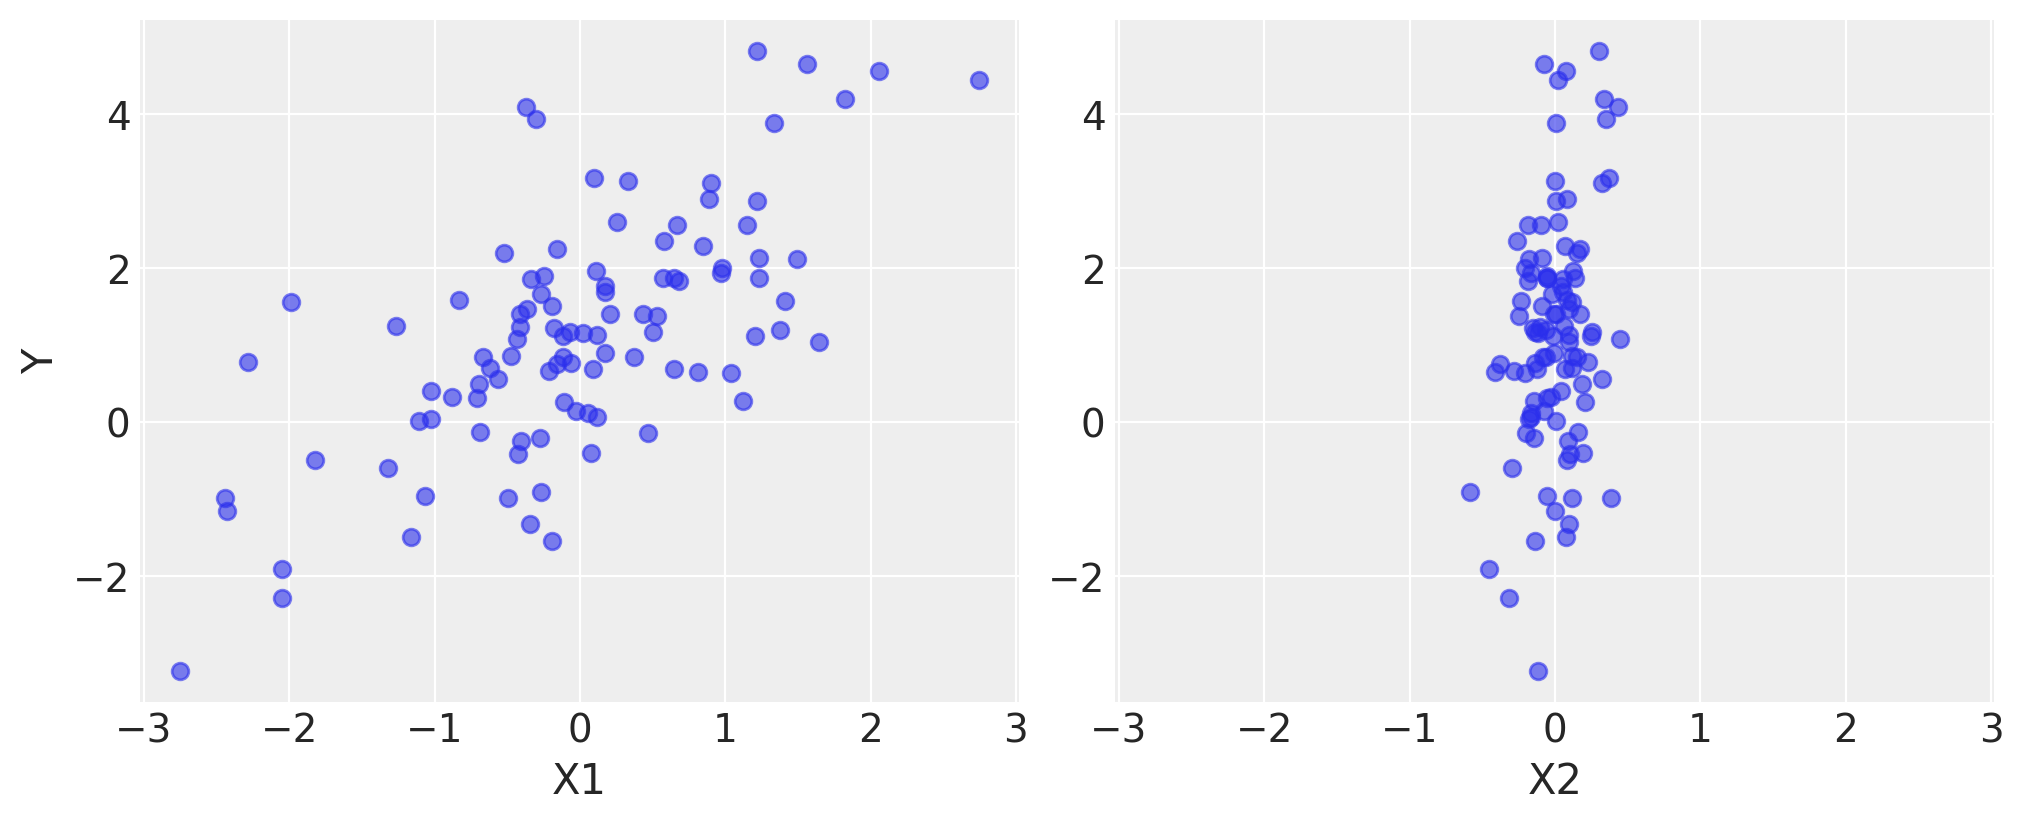

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [9]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [10]:
Y_obs

Y_obs

In [11]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [12]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [13]:
idata.posterior['beta']

<xarray.DataArray 'beta' (chain: 4, draw: 1000, beta_dim_0: 2)> Size: 64kB
array([[[1.01309856, 3.15349594],
        [1.22203746, 2.36167228],
        [1.0219513 , 1.85721152],
        ...,
        [1.02551547, 2.4683611 ],
        [1.0248042 , 3.20348958],
        [1.17458723, 2.94407699]],

       [[1.27695569, 2.45122928],
        [1.13444433, 3.77803488],
        [0.91259975, 1.97317608],
        ...,
        [0.93428134, 3.2803636 ],
        [1.09196799, 2.98211082],
        [1.03158184, 2.34005381]],

       [[0.98417208, 3.78429068],
        [1.2229455 , 2.97168845],
        [1.07693214, 3.16103266],
        ...,
        [1.04059937, 3.12379814],
        [1.02059664, 2.80612566],
        [1.04112318, 3.1420165 ]],

       [[1.06503434, 2.8602203 ],
        [0.98039781, 2.57013916],
        [1.00440761, 3.26220547],
        ...,
        [0.96042897, 1.92293609],
        [0.91950118, 4.02597201],
        [1.0861534 , 2.62507932]]])
Coordinates:
  * chain       (chain) int32 16B 0 1 2 3
  * draw        (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * beta_dim_0  (beta_dim_0) int32 8B 0 1

In [17]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 23 seconds.


In [18]:
slice_idata 

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

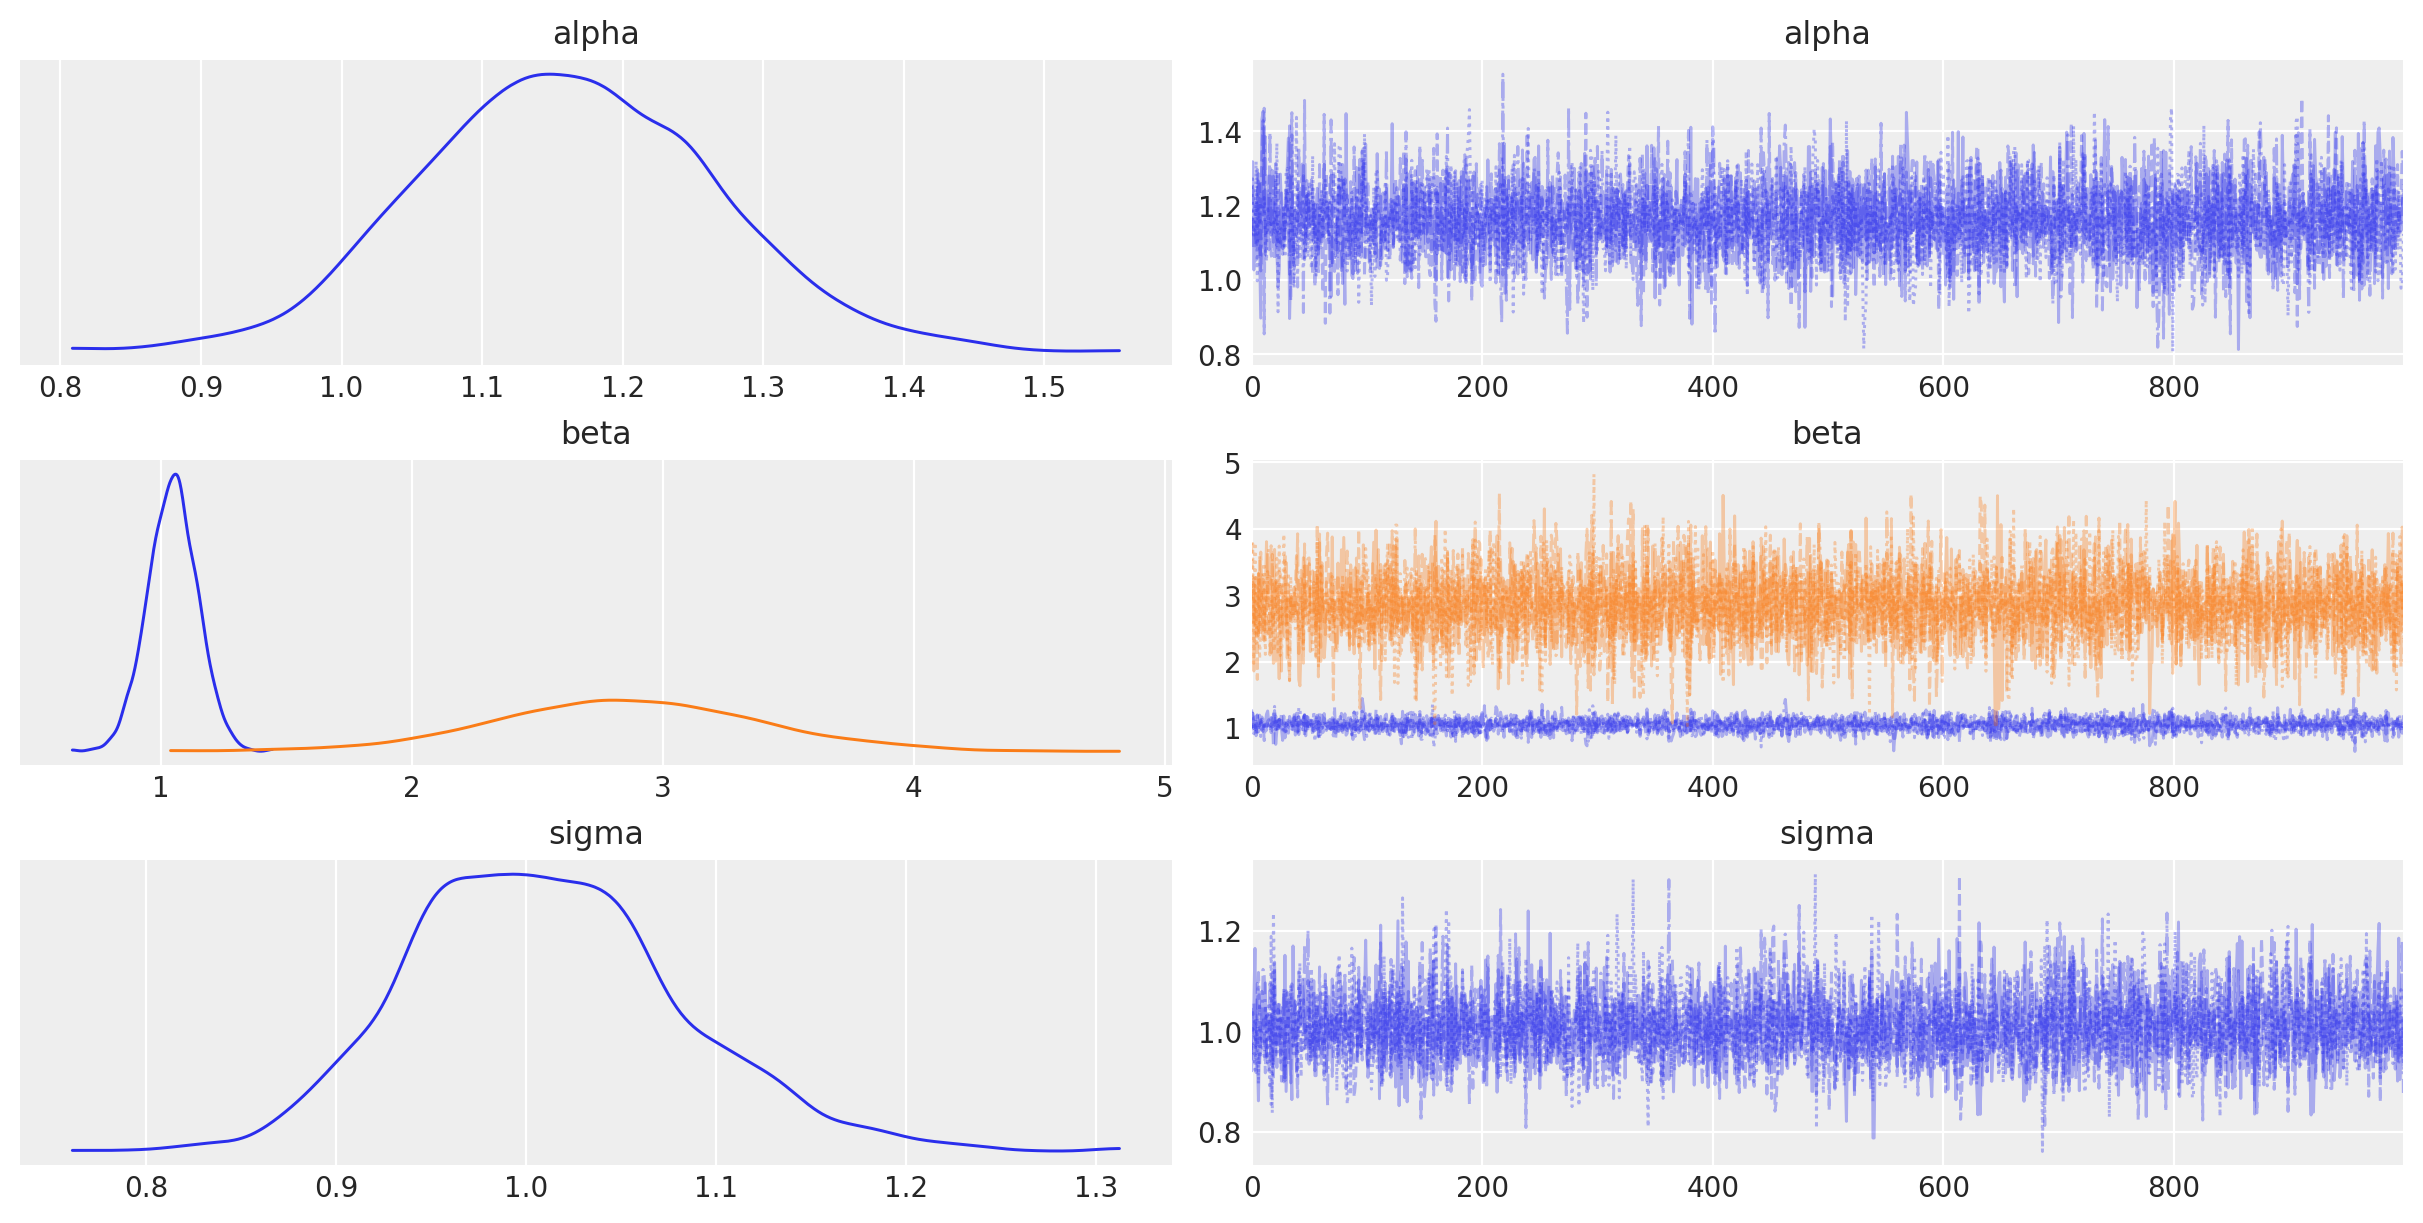

In [19]:
az.plot_trace(idata, combined=True)

In [20]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.16,0.10,0.98,1.36,0.00,0.0,6235.12,3037.03,1.0
beta[0],1.05,0.10,0.86,1.23,0.00,0.0,5962.75,3213.00,1.0
beta[1],2.85,0.53,1.88,3.88,0.01,0.0,6350.09,2867.88,1.0
sigma,1.01,0.07,0.88,1.14,0.00,0.0,5991.04,3166.43,1.0
